<span>
<b>Author:</b> <a href="http://about.giuliorossetti.net">Giulio Rossetti</a><br/>
<b>Python version:</b>  3.7<br/>
<b>Networkx version:</b>  2.x<br/>
<b>Last update:</b> 18/03/2020
</span>

<a id='top'></a>
# *It's a Small World!*

``Networkx`` is a python library designed to provide support to analysis of complex networks.

In this notebook are introduced some of the main features of the library and an overview of its functionalities.

**Note:** this notebook is purposely not 100% comprehensive, it only discusses the basic things you need to get started. <br/> A complete documentation (and tutorial) is available on the project [website](https://networkx.github.io/documentation/latest/)


In [1]:
import networkx as nx
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import powerlaw
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline 

## Synthetic Networks 
``networkx`` allows to generate synthetic network datasets. 

## 1. Watts-Strogatz (small world) graphs

A model to capture large clustering coefficient and  short distances observed in real networks.

From **regular lattice** (p=0)

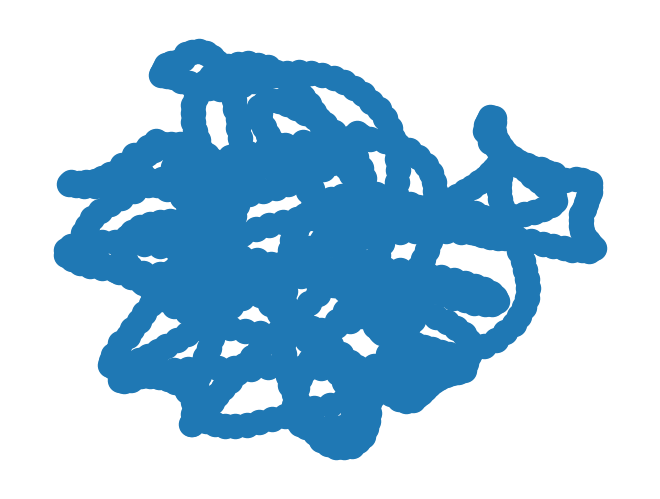

In [3]:
# network generators 2 (small-world)
ws = nx.watts_strogatz_graph(1000, k=4, p=0)
nx.draw(ws)

In [4]:
print(f"Global clustering: {nx.average_clustering(ws)}")

Global clustering: 0.5


In [5]:
print(f"Average shortest path: {nx.average_shortest_path_length(ws)}")

Average shortest path: 125.37537537537537


..to **random** netwroks (p=1)..

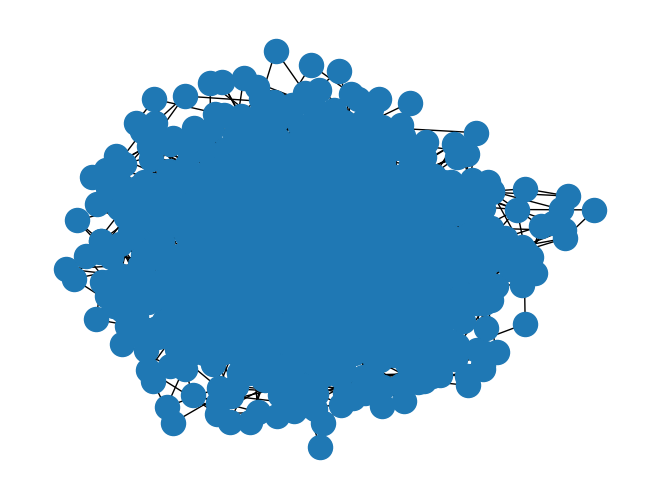

In [6]:
# network generators 2 (small-world)
ws = nx.watts_strogatz_graph(1000, k=4, p=1)
nx.draw(ws)

In [7]:
print(f"Global clustering: {nx.average_clustering(ws)}")

Global clustering: 0.002295238095238095


In [8]:
print(f"Average shortest path: {nx.average_shortest_path_length(ws)}")

Average shortest path: 5.323705705705706


.. passing by the **small world** regime (0.001 < p < 0.1)

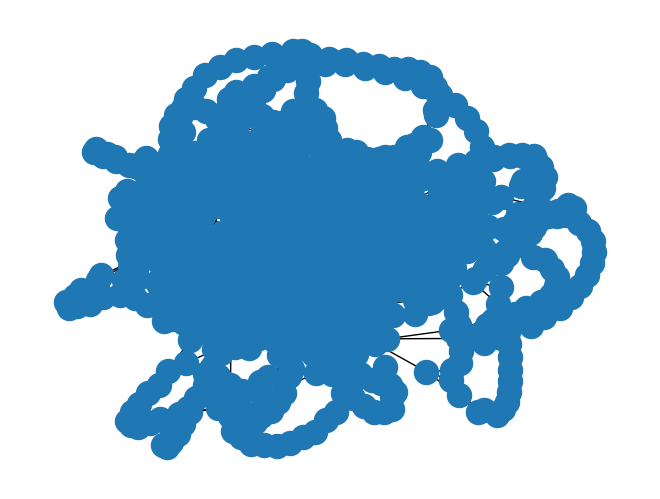

In [9]:
# network generators 2 (small-world)
ws = nx.watts_strogatz_graph(1000, k=4, p=0.05)
nx.draw(ws)

In [10]:
print(f"Global clustering: {nx.average_clustering(ws)}")

Global clustering: 0.4316666666666667


In [11]:
print(f"Average shortest path: {nx.average_shortest_path_length(ws)}")

Average shortest path: 11.098044044044045


## Laboratorio 3

In [39]:
def print_stats(value, tag="value"):
    print(f"{tag}: {value:>4}")

N = [100, 500, 1000, 5000]

P1. Tomando como valores N = 1000, 10000, 100000, comprobar que las propiedades de longitud 
de camino promedio y coeficiente de agrupamiento se mantiene similar a los observados en el 
mundo real para valores de 0.001 < p < 0.1.

In [42]:
def p1_lab():
    p = 0.05
    for n in N:
        ws = nx.watts_strogatz_graph(n, k=4, p=p)
        print(f"N = {n}")
        print_stats(nx.average_clustering(ws), "Global clustering")
        print_stats(nx.average_shortest_path_length(ws), "Average shortest path")
    # print results

In [43]:
p1_lab()

N = 100
Global clustering: 0.43866666666666665
Average shortest path: 5.530505050505051
N = 500
Global clustering: 0.42919999999999997
Average shortest path: 10.2749498997996
N = 1000
Global clustering: 0.4283
Average shortest path: 11.163453453453453
N = 5000
Global clustering: 0.4282666666666667
Average shortest path: 15.08057851570314


P2. Variando los valores de N como en el ejercicio anterior y para p = 0, 0.001, 0.01, 0.01, 0.1 y 1.
realizar 10 experimentos para cada configuración capturas los datos correspondientes y verificar las 
propiedades de camino promedio y coeficiente de agrupamiento. Realizar un gráfico y explicar los 
resultados encontrados

In [41]:
def p2_lab():
    p = [0, 0.001, 0.01, 0.1, 1]
    values = []
    
    for n in N:
        for p_ in p:
            ws = nx.watts_strogatz_graph(n, k=4, p=p_)
            values.append((n, p_, nx.average_clustering(ws), nx.average_shortest_path_length(ws)))
    
    # plot
    df = pd.DataFrame(values, columns=["N", "p", "Global clustering", "Average shortest path"])
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    for n in N:
        # plot values for each N
        df_ = df[df["N"] == n]
        ax[0].plot(df_["p"], df_["Global clustering"], label=f"N={n}")
        ax[1].plot(df_["p"], df_["Average shortest path"], label=f"N={n}")
    # set labels for left plot
    ax[0].set_xlabel("p")
    ax[0].set_ylabel("Global clustering")
    ax[0].legend()
    # set labels for right plot
    ax[1].set_xlabel("p")
    ax[1].set_ylabel("Average shortest path")
    ax[1].legend()
    plt.show()

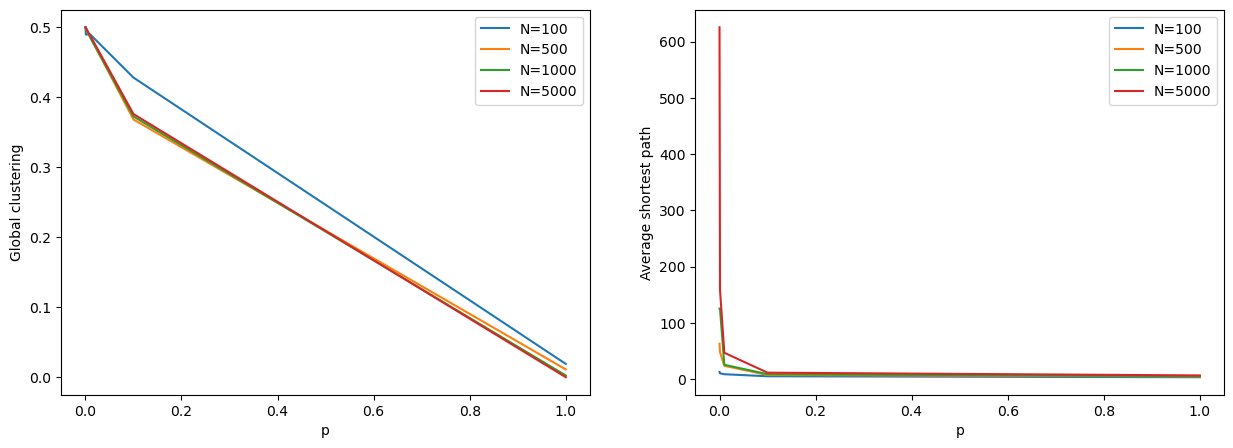

,N,p,Global clustering,Average shortest path
0,100,0.000,0.500000,12.878788
1,100,0.001,0.489667,10.352929
2,100,0.010,0.489667,8.748687
3,100,0.100,0.428095,5.146869
4,100,1.000,0.019286,3.429495
5,500,0.000,0.500000,62.875752
6,500,0.001,0.497933,47.955960
7,500,0.010,0.486067,23.753259
8,500,0.100,0.368257,7.332409
9,500,1.000,0.011395,4.760994


In [40]:
p2_lab()